In [1]:
import pandas as pd
import seaborn as sns

In [3]:
# Đọc dữ liệu
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df = df.dropna()

In [7]:
df["Price"] = df["Quantity"] * df["UnitPrice"]

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


## Vẽ biểu đồ phân bố

<Axes: ylabel='UnitPrice'>

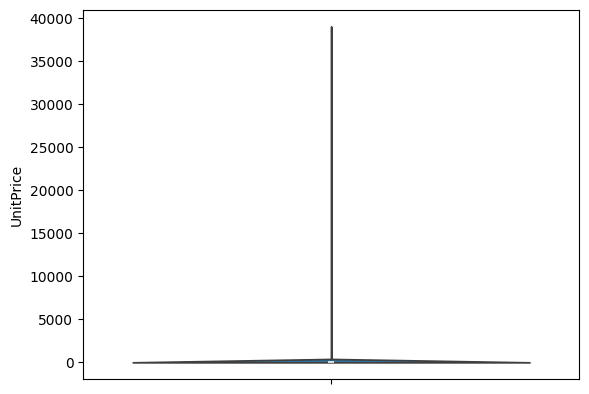

In [9]:
sns.violinplot(y = "UnitPrice", data=df)

<Axes: ylabel='Price'>

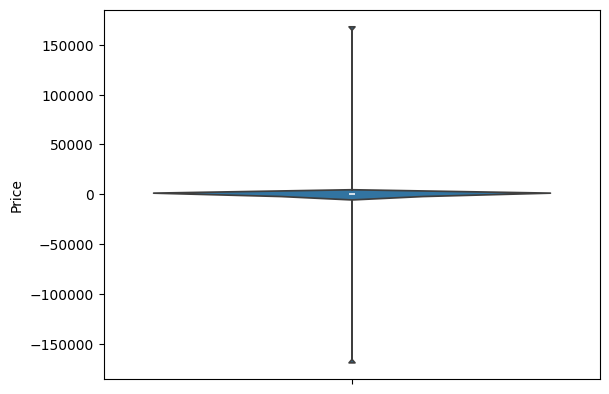

In [10]:
sns.violinplot(y = "Price", data=df)

In [11]:
# Tính số lượng sản phẩm ở mỗi đơn hàng
df2 = df.groupby(['InvoiceNo'])['Quantity'].sum().reset_index()

In [12]:
df2.head()

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


<Axes: ylabel='Quantity'>

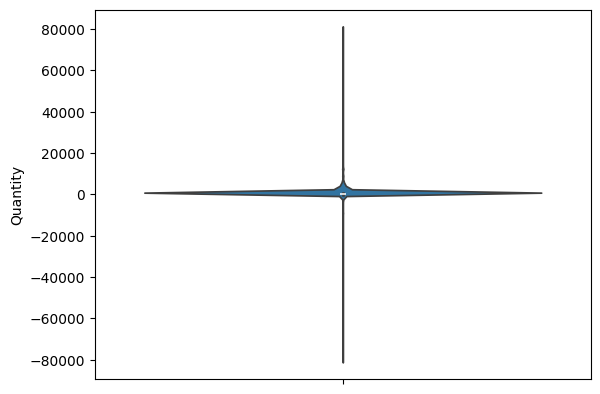

In [13]:
sns.violinplot(y="Quantity", data=df2)

## Vẽ biểu đồ tần số

In [14]:
df3 = df.groupby(['Country'])['Quantity'].sum().reset_index()

In [15]:
df3.head()

,Country,Quantity
0,Australia,83653
1,Austria,4827
2,Bahrain,260
3,Belgium,23152
4,Brazil,356


In [17]:
# Loại bỏ dữ liệu về hóa đơn trùng lặp
df1 = df.drop_duplicates(subset = 'InvoiceNo')

<Axes: xlabel='Country', ylabel='count'>

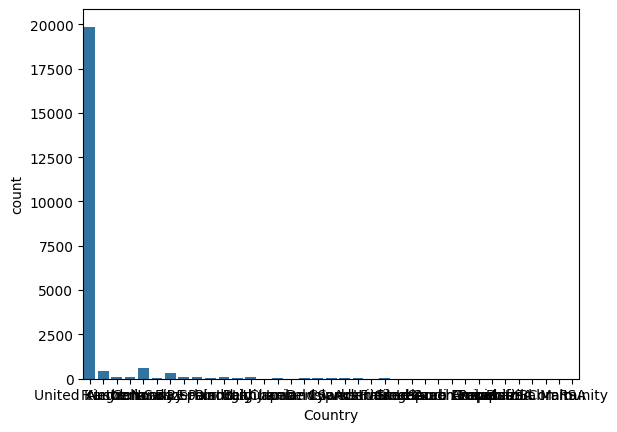

In [18]:
sns.countplot(x = "Country", data = df1)

## Vẽ biểu đồ box plot

<Axes: xlabel='UnitPrice'>

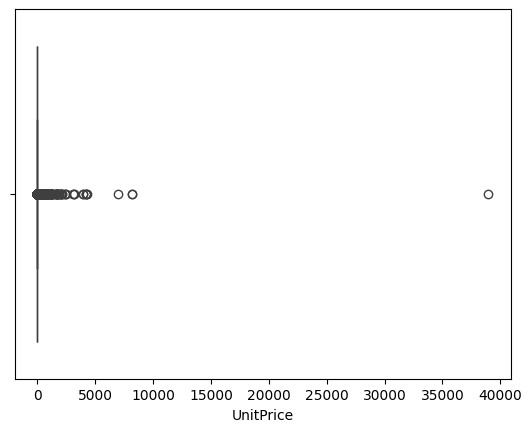

In [19]:
sns.boxplot(x=df["UnitPrice"])

<Axes: xlabel='Quantity'>

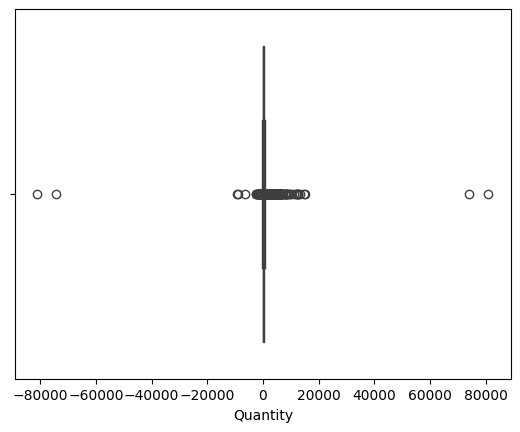

In [20]:
# Biểu đồ box plot cho số lượng sản phẩm mỗi đơn
sns.boxplot(x=df2["Quantity"])